In [1]:
!pip install keras -tuner
!pip install -q keras

     |████████████████████████████████| 16.0 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 39.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 27.4 MB/s eta 0:00:01
     |████████████████████████████████| 30.7 MB 29.9 MB/s eta 0:00:01


In [2]:
# memory footprint support libraries/code

!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()

# XXX: only one GPU on Colab and isn’t guaranteed

gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 


  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=f4164d0b6e3ea8b2808aef1a6f9d737faa6528c4205f73cd1c6d92f8a8e46880
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.8 GB  | Proc size: 115.1 MB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


In [3]:
#!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
#!pip install gputil

try:
  import GPUtil as GPU
  GPUs = GPU.getGPUs()
  device='/gpu:0'
except:
  device='/cpu:0'

In [4]:
%tensorflow_version 2.x

import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Import all libraries

import os
import shutil
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [ ]:
# create test, train and validation directory

os.chdir('/content/drive/My Drive/JF30-22')
if os.path.isdir('train') is False:
  os.makedirs('train')
  os.makedirs('test')
  os.makedirs('valid')

print(os.listdir('/content/drive/My Drive/JF30-22'))

['tst3.txt', 'val1.txt', 'trn1.txt', 'val2.txt', 'tst1.txt', 'val3.txt', 'tst2.txt', 'trn2.txt', 'trn3.txt', 'classlabels.txt', 'readme.txt', '.DS_Store', 'jpg', 'train', 'test', 'valid']


In [ ]:
# Move images from image folder to train, test and validation directory according to the trn, tst and val text file.


dst = '/content/drive/My Drive/JF30-22/train/'
with open('trn1.txt') as my_file:
    for filename in my_file:
        file_name  = ('JFT_'+ str(filename).zfill(6).rstrip() +'.jpg')
        #print(file_name)
        src = r'/content/drive/My Drive/JF30-22/jpg/'+ file_name
        #print(src)
        shutil.move(src, dst)

dst = '/content/drive/My Drive/JF30-22/test/'
with open('val1.txt') as my_file:
    for filename in my_file:
        file_name  = ('JFT_'+ str(filename).zfill(6).rstrip() +'.jpg')
        #print(file_name)
        src = r'/content/drive/My Drive/JF30-22/jpg/'+ file_name
        #print(src)
        shutil.move(src, dst)

dst = '/content/drive/My Drive/JF30-22/test/'
with open('tst1.txt') as my_file:
    for filename in my_file:
        file_name  = ('JFT_'+ str(filename).zfill(6).rstrip() +'.jpg')
        #print(file_name)
        src = r'/content/drive/My Drive/JF30-22/jpg/'+ file_name
        #print(src)
        shutil.move(src, dst)

In [ ]:
# Rename image files inside test, train text files

# for train text file
with open('trn1.txt','r') as f:
    newlines = []
    for line in f.readlines():
        newlines.append(line.replace(line, 'JFT_'+ str(line).zfill(6).rstrip() + '.jpg'+ "\n"))

with open('trn1.txt', 'w') as f:
    for line in newlines:
        f.write(line) 

# for test text file
with open('tst1.txt','r') as f:
    newlines = []
    for line in f.readlines():
        newlines.append(line.replace(line, 'JFT_'+ str(line).zfill(6).rstrip() + '.jpg'+ "\n"))

with open('tst1.txt', 'w') as f:
    for line in newlines:
        f.write(line) 

# for valid text file
with open('val1.txt','r') as f:
    newlines = []
    for line in f.readlines():
        newlines.append(line.replace(line, 'JFT_'+ str(line).zfill(6).rstrip() + '.jpg'+ "\n"))

with open('val1.txt', 'w') as f:
    for line in newlines:
        f.write(line) 


In [7]:
# reading text files

all_df = pd.read_csv("/content/drive/My Drive/JF30-22/classlabels.txt", header = None, dtype=str)
all_df.columns = ['id', 'label']
#all_df.head(2)

trn1 = pd.read_csv('/content/drive/My Drive/JF30-22/trn1.txt', header = None, dtype=str)
trn1.columns = ['id']
#trn1.head(2)

val1 = pd.read_csv('/content/drive/My Drive/JF30-22/val1.txt', header = None, dtype=str)
val1.columns = ['id']
#trn1.head(2)

tst1 = pd.read_csv('/content/drive/My Drive/JF30-22/tst1.txt', header = None, dtype=str)
tst1.columns = ['id']
#tst1.head(2)

# Baseline Model

Baseline model is: 4.3272481406355645


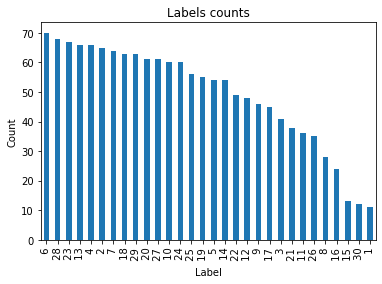

In [8]:
Baseline = all_df['label'].value_counts()* 100/len(all_df['label'])
print('Baseline model is:', Baseline[6])


# checking class labels distribution for baseline
# shows class label 6 having maximum count of images

all_df.label.value_counts().plot(kind='bar')
plt.title('Labels counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [9]:
# merge data (id and label)

train_data= pd.merge(all_df, trn1)
val_data= pd.merge(all_df, val1)
data = pd.merge(all_df, tst1)
test_data = data.append(val_data)

In [10]:
train_data.head(2)

,id,label
0,JFT_00005.jpg,1
1,JFT_00007.jpg,1


In [11]:
#Training data with augmentation

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.10,
      height_shift_range=0.10,
      zoom_range = 0.1,
      brightness_range=[0.2,0.8],
     # np.clip(x_channel + np.random.uniform(-value, value), min_img, max_img) for x_channel in img,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
# Data Generator for Validation Data

train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_data, 
    directory="/content/drive/My Drive/JF30-22/train/",
    x_col="id",
    y_col="label",
    #subset="training",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(64,64))

# Data Generator for Validation Data

'''val_generator = train_datagen.flow_from_dataframe(
    dataframe = val_data, 
    directory="/content/drive/My Drive/JF30-22/valid/",
    x_col="id",
    y_col="label",
    #subset="validation",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(64,64))'''

# Data Generator for Training Data

test_generator = test_datagen.flow_from_dataframe(
    dataframe = test_data, 
    directory="/content/drive/My Drive/JF30-22/test/",
    x_col="id",
    y_col="label",
    #subset="training",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(64,64))

Found 921 validated image filenames belonging to 30 classes.
Found 558 validated image filenames belonging to 30 classes.


In [28]:
# Build Model

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3], padding = 'same'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding = 'same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.5))


cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=30, activation='softmax'))
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
dropout_6 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)             

In [29]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [30]:
Model = cnn.fit_generator(
    train_generator, 
    steps_per_epoch =train_generator.samples/train_generator.batch_size , 
    epochs=10, 
    validation_data = test_generator,
    validation_steps = test_generator.samples/test_generator.batch_size,
    verbose=1)

Epoch 1/10
29/28 [==============================] - 24s 837ms/step - loss: 3.2029 - accuracy: 0.1086 - val_loss: 3.1033 - val_accuracy: 0.1398
Epoch 2/10
29/28 [==============================] - 24s 819ms/step - loss: 2.6448 - accuracy: 0.2324 - val_loss: 2.7698 - val_accuracy: 0.2294
Epoch 3/10
29/28 [==============================] - 24s 825ms/step - loss: 2.1551 - accuracy: 0.3388 - val_loss: 2.1574 - val_accuracy: 0.3978
Epoch 4/10
29/28 [==============================] - 24s 820ms/step - loss: 1.8408 - accuracy: 0.4343 - val_loss: 1.9337 - val_accuracy: 0.4014
Epoch 5/10
29/28 [==============================] - 24s 820ms/step - loss: 1.5482 - accuracy: 0.5071 - val_loss: 1.6456 - val_accuracy: 0.4928
Epoch 6/10
29/28 [==============================] - 24s 823ms/step - loss: 1.4429 - accuracy: 0.5375 - val_loss: 1.7026 - val_accuracy: 0.4552
Epoch 7/10
29/28 [==============================] - 24s 829ms/step - loss: 1.2964 - accuracy: 0.5863 - val_loss: 1.3936 - val_accuracy: 0.5287

In [31]:
# Model Evaluation

print("Minimum loss", min(Model.history['val_loss']))
print("Maximum loss", max(Model.history['val_loss']))
print("Accuracy", max(Model.history['accuracy']))
print("Val_Accuracy", max(Model.history['val_accuracy']))

Minimum loss 1.2529270648956299
Maximum loss 3.1033236980438232
Accuracy 0.6590662598609924
Val_Accuracy 0.5913978219032288


In [32]:
# Plot the accuracy and loss curves

losses = pd.DataFrame(cnn.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,3.202927,0.108578,3.103324,0.139785
1,2.644795,0.232356,2.769843,0.229391
2,2.155105,0.338762,2.157362,0.397849
3,1.840833,0.434311,1.933689,0.401434
4,1.548243,0.507058,1.645568,0.492832


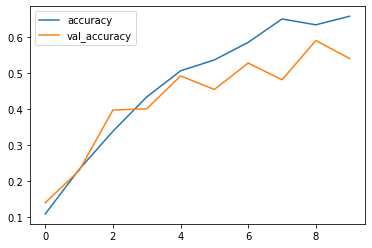

In [33]:
losses[['accuracy','val_accuracy']].plot()

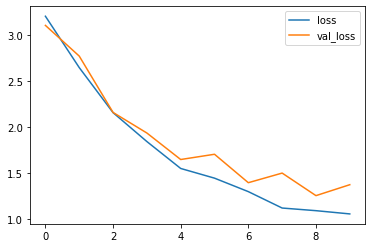

In [34]:
losses[['loss','val_loss']].plot()

# Note:

The dataset consist of Jena flower having 30 categories.

The train data text file has 279 image data in the dataset while that of test data test has 921 image data in the dataset. 

Since its better to have training data more in quantity than test data, I have swapped the dataset between train and test.


# Conclusion


CNN Model is created using

- flow_from_dataframe method for data preprocessing (where it takes dataframe and the path to a directory)


- mix of padding techniques i.e. 'same' and 'valid' to have better training of the model and keeping the output shape in control


- max pooling

From the accuracy plot, it is observed that Train and Validation accuracy has been increasing throughout the epochs

From the loss plot, it is observed that both the Training and validation errors are low.

Overall the model is performing quite better than the baseline i.e. having accuracy of 59%